In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#helps with conditional indexing
import numpy as np

In [2]:
datasetInitial = pd.read_csv('FastFoodNutritionFacts.csv')

In [3]:
datasetInitial.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [4]:
#looked up calorie count for burgerking farmhouse king to fill the only null in "protein" column
datasetInitial.loc[205, "protein"] = 63

In [5]:
#dropping the fiber, vitamin-a and -c, calcium, and salad columns because they have either a lot of nulls or are not needed

colToDrop = ["fiber","vit_a","vit_c","calcium","salad"]

#creates new, updated dataset. this one will have no nulls
df = datasetInitial.drop(columns = colToDrop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  sugar        515 non-null    int64  
 11  protein      515 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 48.4+ KB


In [6]:
mcdAvgCalories = np.mean(df.loc[df["restaurant"] == "Mcdonalds" , "calories"])
mcdAvgCalories

640.3508771929825

In [7]:
avg = df[df.loc[:, "restaurant"] == "Mcdonalds"]["calories"].mean()

avg

640.3508771929825

In [8]:
restaurants = df["restaurant"].value_counts()
restaurants

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

In [9]:
difRes = ["Taco Bell","Subway","Burger King","Mcdonalds","Arbys","Sonic","Dairy Queen","Chick Fil-A"]

#constants for the index of each restaurantr
tb = 0
sw = 1
bk = 2
mcd = 3
ab = 4
sc = 5
dq = 6
cfa = 7

mins = {
    "restaurant": difRes,
    "calories":[],
    "cal_fat":[],
    "total_fat":[],
    "sat_fat":[],
    "trans_fat":[],
    "cholesterol":[],
    "sodium":[],
    "total_carb":[],
    "sugar":[],
    "protein":[]
}

maxs = {
    "restaurant": difRes,
    "calories":[],
    "cal_fat":[],
    "total_fat":[],
    "sat_fat":[],
    "trans_fat":[],
    "cholesterol":[],
    "sodium":[],
    "total_carb":[],
    "sugar":[],
    "protein":[]
}

meds = {
    "restaurant": difRes,
    "calories":[],
    "cal_fat":[],
    "total_fat":[],
    "sat_fat":[],
    "trans_fat":[],
    "cholesterol":[],
    "sodium":[],
    "total_carb":[],
    "sugar":[],
    "protein":[]
}

for i in range(len(difRes)):
     for col in meds:
        if col != "restaurant":
            mins[col].append(round(df[df.loc[:, "restaurant"] == difRes[i]][col].min(), 3))
            maxs[col].append(round(df[df.loc[:, "restaurant"] == difRes[i]][col].max(), 3))
            meds[col].append(round(df[df.loc[:, "restaurant"] == difRes[i]][col].median(), 3))
            

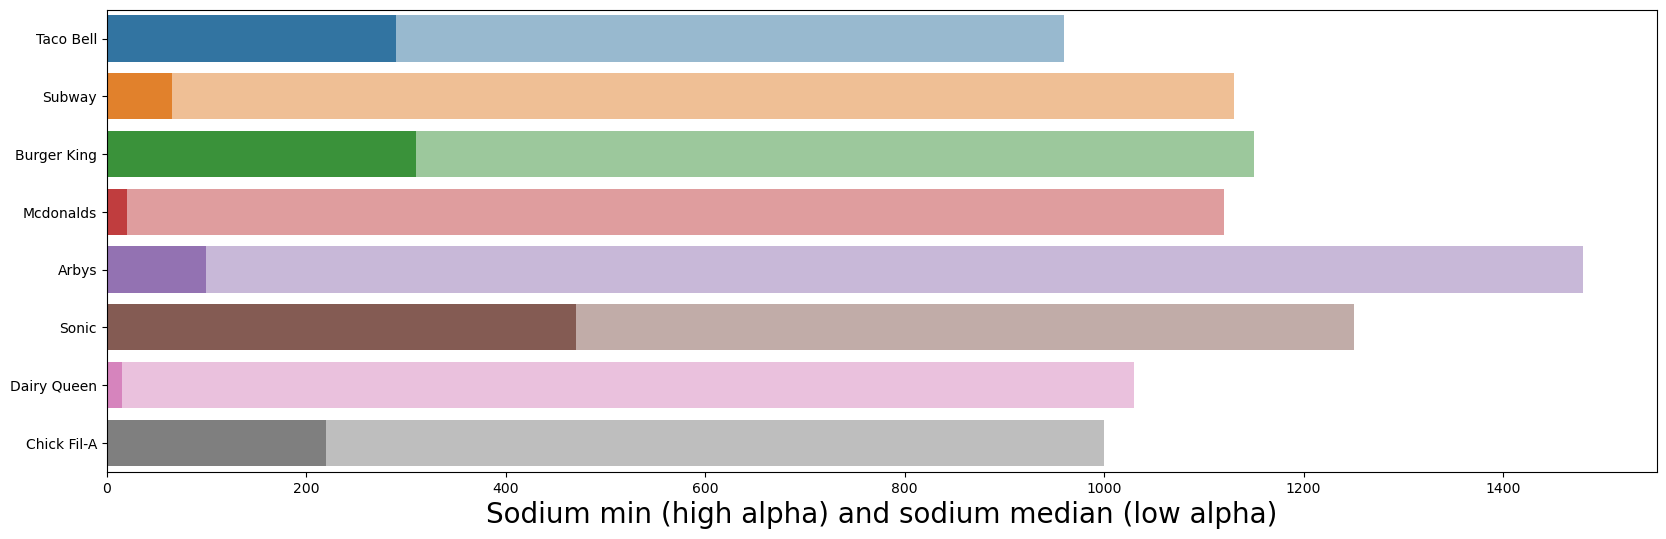

In [10]:
plt.figure(figsize = (20,6))

sns.barplot(data=mins, x='sodium', y='restaurant')
sns.barplot(data=meds, x='sodium', y='restaurant', alpha=0.5)

plt.xlabel("Sodium min (high alpha) and sodium median (low alpha)", fontsize=20)

plt.show()

In [11]:
print(mins['sodium'][dq])
print(meds['sodium'][tb])

15
960.0


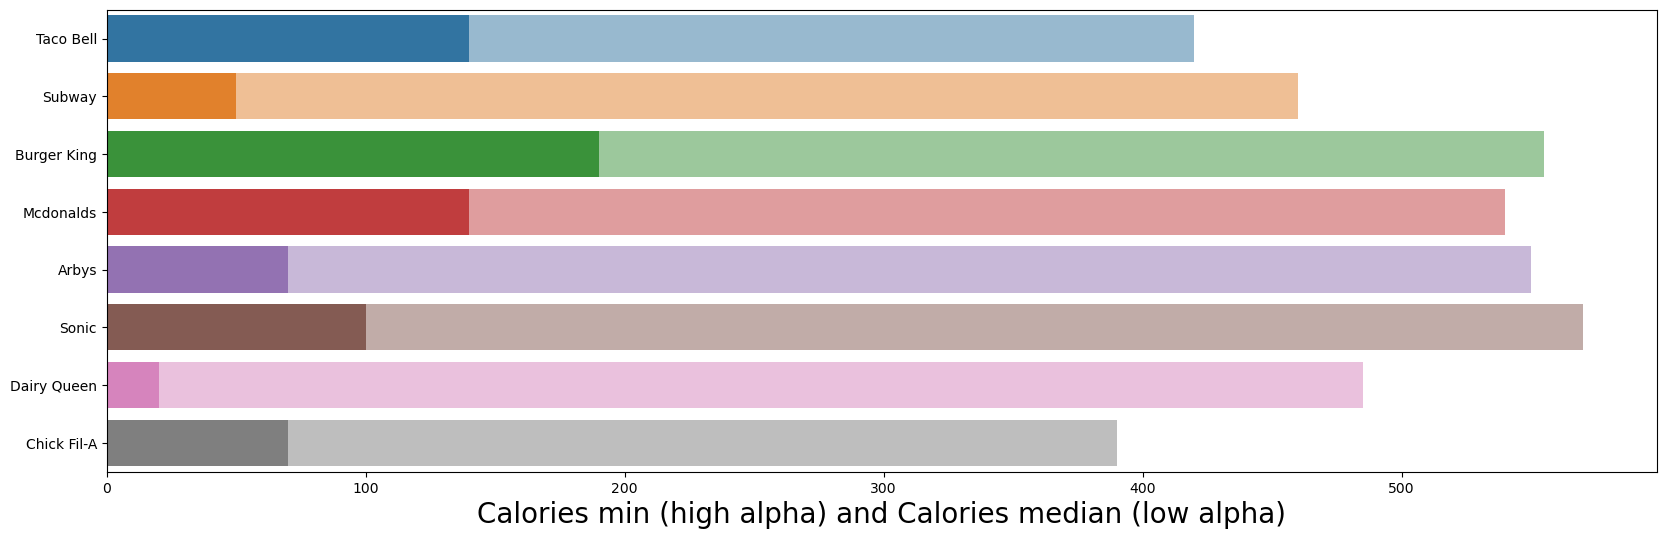

In [12]:
plt.figure(figsize = (20,6))

sns.barplot(data=mins, x='calories', y='restaurant')
sns.barplot(data=meds, x='calories', y='restaurant', alpha=0.5)

plt.xlabel("Calories min (high alpha) and Calories median (low alpha)", fontsize=20)

plt.show()

In [13]:
print(mins['calories'][dq])
print(meds['calories'][cfa])

20
390.0


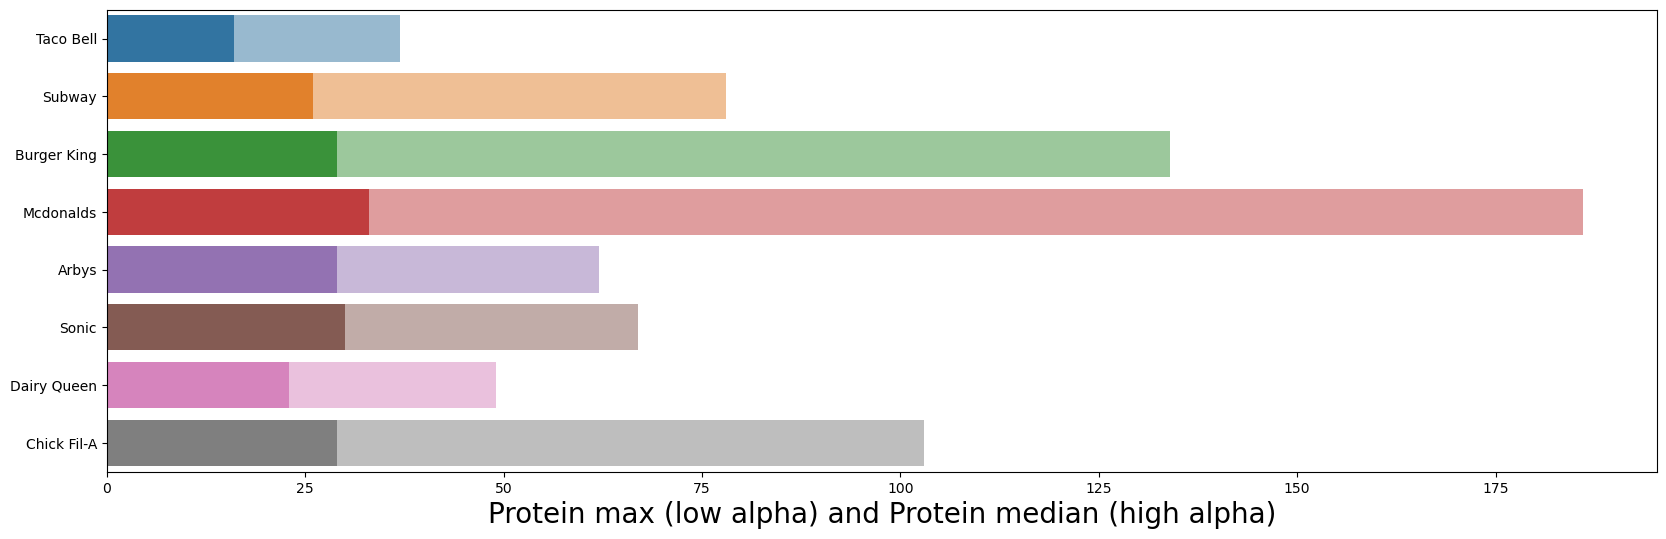

In [14]:
plt.figure(figsize = (20,6))

sns.barplot(data=maxs, x='protein', y='restaurant', alpha=0.5)
sns.barplot(data=meds, x='protein', y='restaurant')

plt.xlabel("Protein max (low alpha) and Protein median (high alpha)", fontsize=20)

plt.show()

In [15]:
print(maxs['protein'][mcd])
print(meds['protein'][mcd])

186.0
33.0


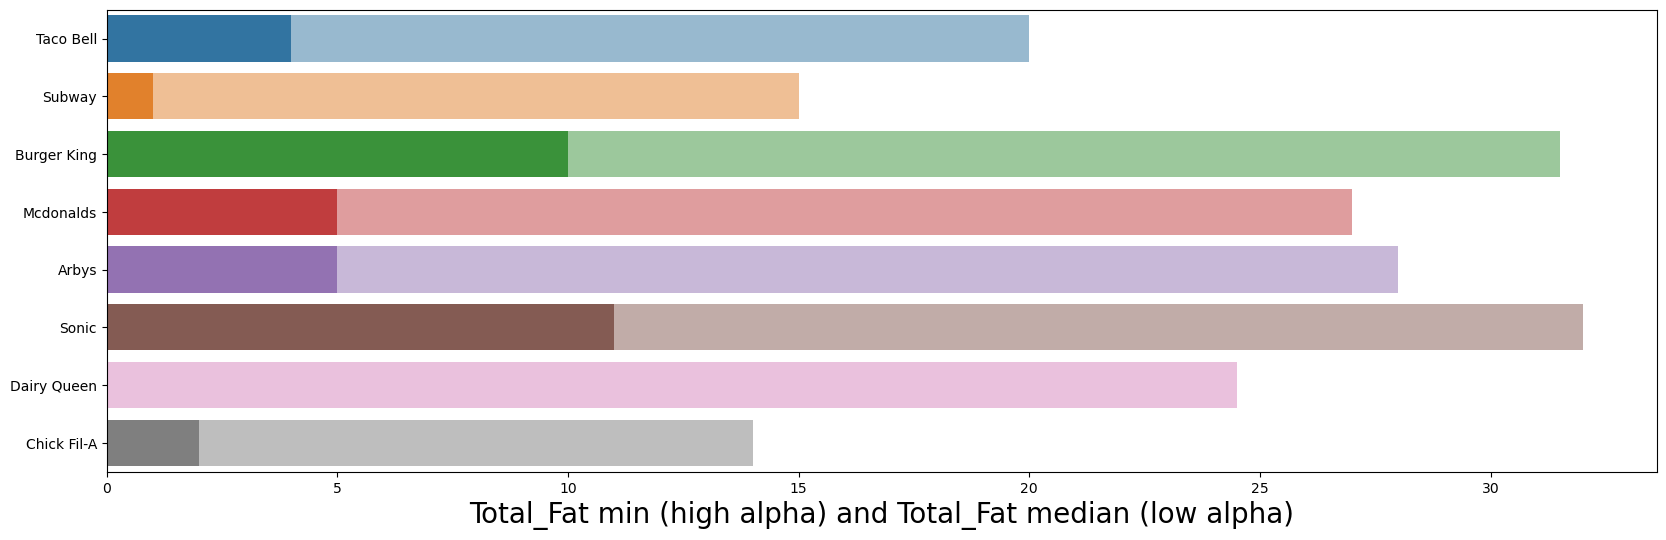

In [16]:
plt.figure(figsize = (20,6))

sns.barplot(data=mins, x='total_fat', y='restaurant')
sns.barplot(data=meds, x='total_fat', y='restaurant', alpha=0.5)

plt.xlabel("Total_Fat min (high alpha) and Total_Fat median (low alpha)", fontsize=20)

plt.show()

In [17]:
print(mins['total_fat'][dq])
print(meds['total_fat'][cfa])

0
14.0


In [18]:
df[df.loc[:,'total_fat'] == 0]["item"]

302    Side Salad
Name: item, dtype: object

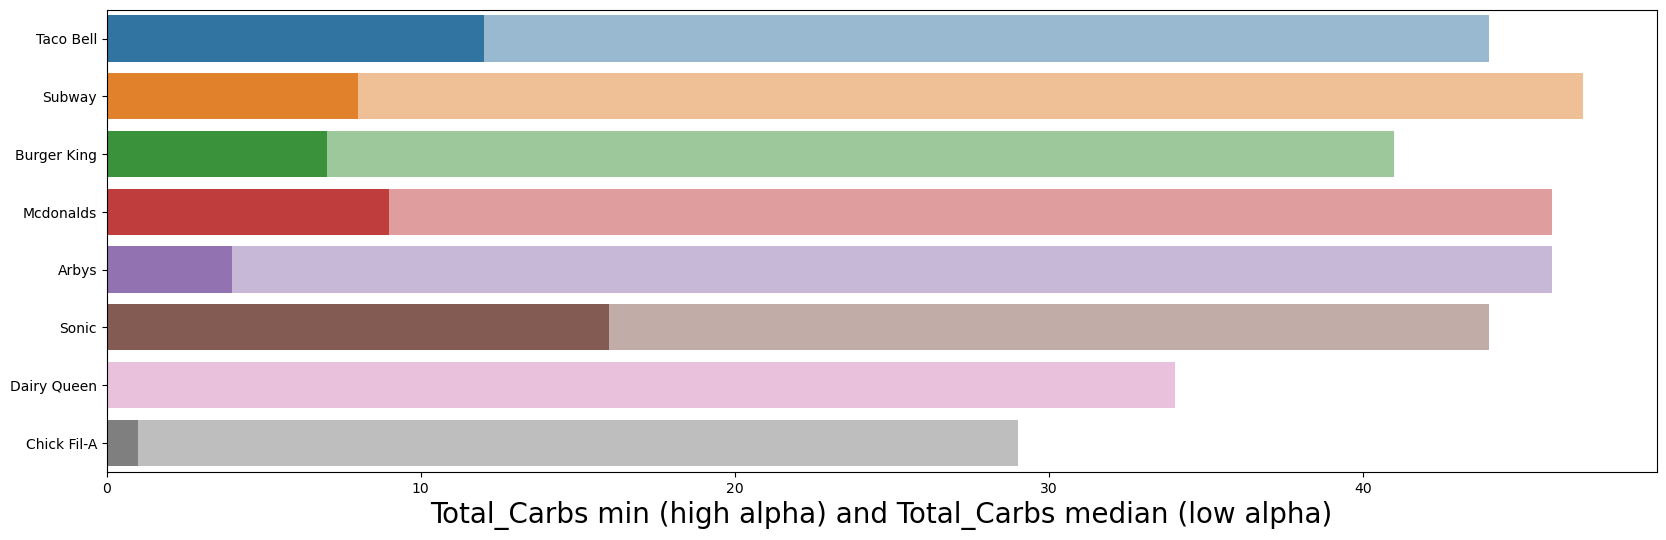

In [19]:
plt.figure(figsize = (20,6))

sns.barplot(data=mins, x='total_carb', y='restaurant')
sns.barplot(data=meds, x='total_carb', y='restaurant', alpha=0.5)

plt.xlabel("Total_Carbs min (high alpha) and Total_Carbs median (low alpha)", fontsize=20)

plt.show()

In [20]:
print(mins['total_carb'][dq])
print(meds['total_carb'][cfa])

0
29.0


In [21]:
df[df.loc[:,'total_fat'] == 0]

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,protein
302,Dairy Queen,Side Salad,20,0,0,0.0,0.0,0,15,5,3,1.0


In [25]:
df.loc[df["restaurant"] == "Burger King" , "calories"]

192    1550
193    1000
194     330
195     290
196    1040
       ... 
257     210
258     530
259     410
260     700
261     760
Name: calories, Length: 70, dtype: int64